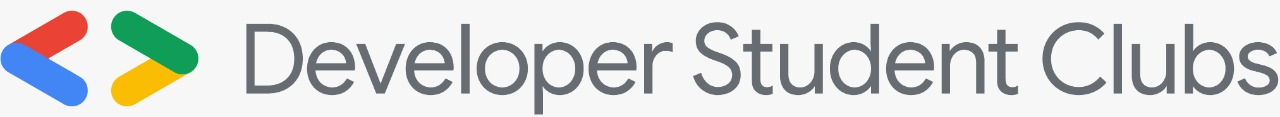

## Binning Data with Pandas cut and qcut

This notebook accompanies the article posted on [pbpython.com](http://pbpython.com/pandas-qcut-cut.html)

## Let's import our libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

## now read the data

In [8]:
raw_df = pd.read_excel('2018_Sales_Total.xlsx')

In [9]:
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


### as we saw from the data we can compine the prices for each customer by grouping them

In [6]:
# finds unique account number for each name then sums over the ext price and reset index == drop the grouped by columns
#df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

In [18]:
raw_df.groupby(['account number', 'name']).describe().head()

quantity                                          \
                               count       mean        std  min    25%   50%   
account number name                                                            
141962         Herman LLC       62.0  24.806452  15.020029 -1.0  10.00  25.0   
146832         Kiehn-Spinka     79.0  22.227848  13.689739 -1.0  12.00  21.0   
163416         Purdy-Kunde      53.0  27.358491  14.085036  2.0  13.00  30.0   
218895         Kulas Inc        94.0  24.095745  15.470450 -1.0  10.25  23.5   
239344         Stokes LLC       72.0  24.527778  15.046381 -1.0  10.00  29.0   

                                         unit price             ...          \
                               75%   max      count       mean  ...     75%   
account number name                                             ...           
141962         Herman LLC    37.75  49.0       62.0  52.566935  ...  79.155   
146832         Kiehn-Spinka  33.00  49.0       79.0  55.561013  ...  82.220   
163416         Purdy-Kunde   39.00  49.0       53.0  50.340943  ...  70.100   
218895         Kulas Inc     37.75  49.0       94.0  59.661596  ...  83.530   
239344         Stokes LLC    37.00  49.0       72.0  51.545278  ...  77.065   

                                   ext price                                   \
                               max     count         mean          std    min   
account number name                                                             
141962         Herman LLC    97.52      62.0  1336.532258  1045.200332 -12.17   
146832         Kiehn-Spinka  99.27      79.0  1260.870506  1096.482652 -54.02   
163416         Purdy-Kunde   98.69      53.0  1469.777547  1148.110119  64.20   
218895         Kulas Inc     99.73      94.0  1461.191064  1155.916364 -72.21   
239344         Stokes LLC    98.83      72.0  1271.332222  1035.536929 -57.02   

                                                                   
                                  25%      50%       75%      max  
account number name                                                
141962         Herman LLC    440.9325  1095.49  1973.385  3970.12  
146832         Kiehn-Spinka  386.4800   894.96  1904.460  4824.54  
163416         Purdy-Kunde   472.2900  1116.78  2339.570  4414.62  
218895         Kulas Inc     541.1600  1163.92  2323.710  4590.81  
239344         Stokes LLC    431.1175  1050.82  1819.190  3775.22  

[5 rows x 24 columns]

In [19]:
raw_df.groupby(['account number', 'name'])['ext price'].describe().head()

,,count,mean,std,min,25%,50%,75%,max
account number,name,,,,,,,,
141962,Herman LLC,62.0,1336.532258,1045.200332,-12.17,440.9325,1095.49,1973.385,3970.12
146832,Kiehn-Spinka,79.0,1260.870506,1096.482652,-54.02,386.4800,894.96,1904.460,4824.54
163416,Purdy-Kunde,53.0,1469.777547,1148.110119,64.20,472.2900,1116.78,2339.570,4414.62
218895,Kulas Inc,94.0,1461.191064,1155.916364,-72.21,541.1600,1163.92,2323.710,4590.81
239344,Stokes LLC,72.0,1271.332222,1035.536929,-57.02,431.1175,1050.82,1819.190,3775.22


In [25]:
raw_df.groupby(['account number', 'name'])['ext price'].sum().head()

account number  name        
141962          Herman LLC       82865.00
146832          Kiehn-Spinka     99608.77
163416          Purdy-Kunde      77898.21
218895          Kulas Inc       137351.96
239344          Stokes LLC       91535.92
Name: ext price, dtype: float64

In [26]:
raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index().head()

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


In [27]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

### now let's visualize our data

In [28]:
df.head()

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


A histogram is an example of binning data and showing the visual representation of the data distribution

## Introducing qcut
### let's visualize the col of prices

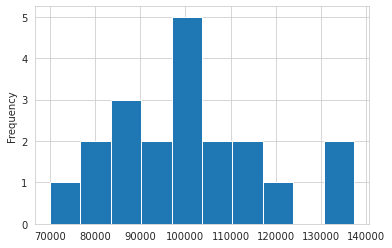

In [29]:
df['ext price'].plot(kind='hist') 

Describe shows how data can be cut by percentiles

In [30]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

Here is an example of using [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

#### If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

In [34]:
pd.qcut(df['ext price'], q=4) # q stands for quantiles 

0       (70004.359, 89137.708]
1      (89137.708, 100271.535]
2       (70004.359, 89137.708]
3      (110132.552, 137351.96]
4      (89137.708, 100271.535]
5      (89137.708, 100271.535]
6       (70004.359, 89137.708]
7     (100271.535, 110132.552]
8      (110132.552, 137351.96]
9      (110132.552, 137351.96]
10     (89137.708, 100271.535]
11      (70004.359, 89137.708]
12      (70004.359, 89137.708]
13     (89137.708, 100271.535]
14    (100271.535, 110132.552]
15     (110132.552, 137351.96]
16    (100271.535, 110132.552]
17     (110132.552, 137351.96]
18    (100271.535, 110132.552]
19    (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

Assign the results of the values back to the original dataframe

In [9]:
df['quantile_ex_1'] = pd.qcut( df['ext price'] , q=4)
df['quantile_ex_2'] = pd.qcut( df['ext price'] , q=10, precision=0) 
# percision deciddes the number of numbers after the decimal

In [10]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


Look at the distribution

In [11]:
df['quantile_ex_1'].value_counts()

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [12]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

- terciles: q=[0, 1/3, 2/3, 1] or q=3
- quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
- sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6


In [13]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut( df['ext price'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5 )
# when q is a list it shows the range of the data
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [14]:
df['quantile_ex_3'].value_counts() 

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

#### how do I know what ranges are used to identify the different bins? You can use retbins=True to return the bin labels

In [15]:
results, bin_edges = pd.qcut(df['ext price'],
                             q=[0, .2, .4, .6, .8, 1],
                             labels=bin_labels_5,
                             retbins=True)

results_table = pd.DataFrame( zip(bin_edges , bin_labels_5) , columns=['Threshold', 'Tier'] )

In [16]:
results_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [17]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
freq,5,2,4


### We can pass the percentiles to use to describe

In [18]:
df.describe( percentiles=[0, 1/3, 2/3, 1] )

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,101711.287500
std,231499.208970,27037.449673
min,141962.000000,55733.050000
0%,141962.000000,55733.050000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,184793.700000
max,786968.000000,184793.700000


### labels=False will return integers for each bin

In [19]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1


## cut

#### Remove the added columns to make the examples shorter

In [20]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])

### bins:
#### it sets the bins on a fixed range which you can set the values for
#### bins gets the minimum data and maximum data and sets a fixed width interval between them

In [21]:
pd.cut(df['ext price'], bins=4) 

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55603.989, 87998.212] < (87998.212, 120263.375] < (120263.375, 152528.538] < (152528.538, 184793.7]]

In [22]:
pd.cut(df['ext price'], bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

In [23]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000] # [0:70000] [70000:100000] ... 
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [24]:
df.head()

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,63626.03,silver
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold


#### We can use `nump.linspace` to define the ranges


In [25]:
np.linspace(0, 200000, 9) # create 9 numbers between 0 and 200000 equally spaced

array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
       175000., 200000.])

In [26]:
pd.cut( df['ext price'] , bins=np.linspace(0, 200000, 9) )

0       (50000.0, 75000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (175000.0, 200000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64]): [(0.0, 25000.0] < (25000.0, 50000.0] < (50000.0, 75000.0] < (75000.0, 100000.0] < (100000.0, 125000.0] < (125000.0, 150000.0] < (150000.0, 175000.0] < (175000.0, 200000.0]]

#### `numpy.arange` is another option 

In [27]:
np.arange(0, 200000, 10000) # create numbers between 0 and 200000 with a step of 10000 

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000])

#### `pd.interval_range` is also another function
#### this already creates ranges defined by the start and end and the step as freq, also specifies the closed items included

In [28]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left') 

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)],
              closed='left',
              dtype='interval[int64]')

### Let's visualize the data now

In [29]:
interval_range = pd.interval_range( start=0, freq=10000, end=200000 )
df['cut_ex2'] = pd.cut( df['ext price'], bins=interval_range, labels=[1,2,3] )
df.head()

,account number,name,ext price,cut_ex1,cut_ex2
0,141962,Herman LLC,63626.03,silver,"(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,gold,"(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,gold,"(70000, 80000]"
3,218895,Kulas Inc,137351.96,diamond,"(130000, 140000]"
4,239344,Stokes LLC,91535.92,gold,"(90000, 100000]"


# This concludes our first part 
# prepare your self for the Data Engineering Part